<a href="https://colab.research.google.com/github/cristianbossolasco/Inflacion-Dolar-Argentina/blob/main/Calculo_de_IPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [2]:
# Inflacion prevista para el proximo mes
def get_inflacion_prevista(porcentaje_provisto, df):
  max_index = df.idxmax()
  valor = df.loc[max_index].values[0][0]

  index_new = max_index[0] + relativedelta(months=1)
  valor_new = round(valor + valor * porcentaje_provisto, 4)

  return index_new, valor_new

def get_data():
  url = 'https://www.indec.gob.ar/ftp/cuadros/economia/sh_ipc_07_23.xls'
  excel_file = pd.ExcelFile(url)
  sheet_name = 'Índices IPC Cobertura Nacional'
  skip_rows = 5  # Omitir las primeras 5 filas
  num_rows = 26  # Leer las siguientes 26 filas
  data = excel_file.parse(sheet_name, skiprows=skip_rows, nrows=num_rows)

  filtro = data['Total nacional'] == 'Nivel general'
  ipc_general = data[filtro].set_index('Total nacional').T


  # Descomentar las dos lineas de abajo si se conoce la inflacion prevista del mes en curso
  # index_new, valor_new = get_inflacion_prevista(0.068, ipc_general)
  # ipc_general.loc[index_new] = valor_new

  # calculo los % de variacion mensual, trimestral y interanual
  #ipc_general['Variación mensual'] = round(ipc_general['Nivel general'].pct_change() * 100, 1)
  #ipc_general['Variación Timestral'] = round(ipc_general['Nivel general'].pct_change(periods=3) * 100, 1)
  #ipc_general['Variación Anual'] = round(ipc_general['Nivel general'].pct_change(periods=12) * 100, 1)
  for periodos in range(1,13):
    ipc_general[f'Inf_{periodos}'] = round(ipc_general['Nivel general'].pct_change(periods=periodos) * 100, 1)

  # Renombro las columnas
  ipc_general = ipc_general.rename(columns={'Nivel general': 'Valor'})

  return ipc_general

In [3]:
ipc = get_data()
ipc = ipc.reset_index()
ipc = ipc.rename(columns={'index': 'Periodo'})

In [4]:
ipc.sort_values(by=['Periodo'], ascending = False).head(36)

Total nacional,Periodo,Valor,Inf_1,Inf_2,Inf_3,Inf_4,Inf_5,Inf_6,Inf_7,Inf_8,Inf_9,Inf_10,Inf_11,Inf_12
78,2023-06-01,1709.6115,6.0,14.2,23.8,33.3,42.1,50.7,58.4,66.2,76.7,87.6,100.7,115.6
77,2023-05-01,1613.5895,7.8,16.8,25.8,34.1,42.2,49.5,56.9,66.8,77.1,89.4,103.5,114.2
76,2023-04-01,1497.2147,8.4,16.7,24.5,32.0,38.7,45.5,54.8,64.3,75.8,88.8,98.8,108.8
75,2023-03-01,1381.1601,7.7,14.8,21.7,28.0,34.3,42.8,51.6,62.2,74.2,83.4,92.6,104.3
74,2023-02-01,1282.7091,6.6,13.1,18.8,24.7,32.6,40.8,50.6,61.7,70.3,78.9,89.7,102.5
73,2023-01-01,1202.9790,6.0,11.5,16.9,24.4,32.0,41.2,51.7,59.7,67.8,77.9,89.9,98.8
72,2022-12-01,1134.5875,5.1,10.3,17.3,24.5,33.2,43.1,50.6,58.3,67.8,79.1,87.5,94.8
71,2022-11-01,1079.2787,4.9,11.6,18.5,26.7,36.1,43.3,50.5,59.6,70.4,78.4,85.3,92.4
70,2022-10-01,1028.7060,6.3,12.9,20.8,29.7,36.6,43.5,52.2,62.4,70.0,76.6,83.4,88.0
69,2022-09-01,967.3076,6.2,13.6,22.0,28.4,34.9,43.1,52.7,59.9,66.1,72.5,76.8,83.0


<Axes: >

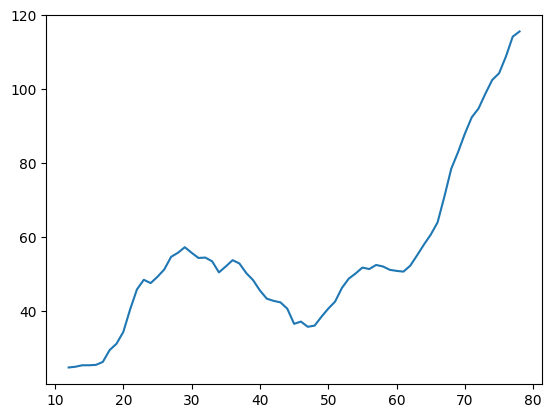

In [5]:
ipc['Inf_12'].plot()